# Titanic Dataset 

In [1]:
# Numeric Data
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline

## I - Statistical summaries and visualizations

In [2]:
titanic = pd.read_csv('files/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


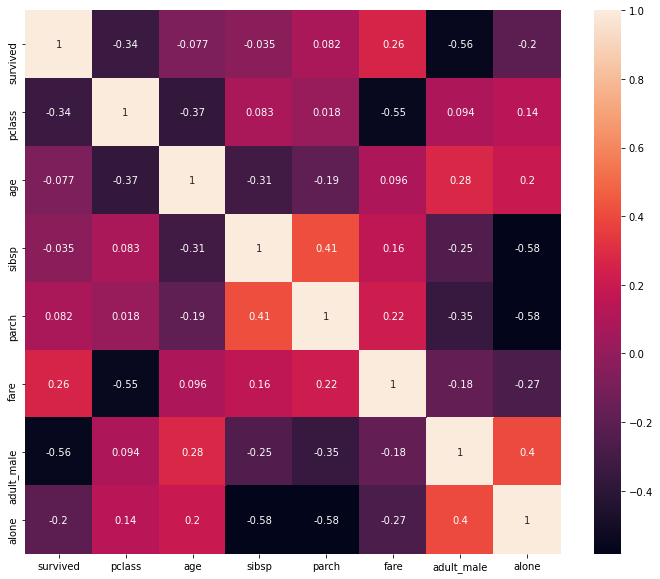

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(titanic.corr(),annot=True)

### 1. Relationship between age and survival

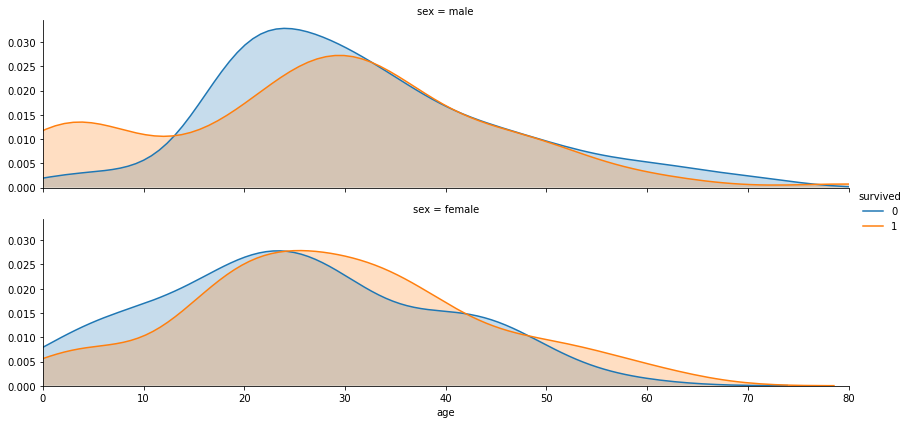

In [5]:
# Create a grid to separate plots by gender
facet = sns.FacetGrid(titanic, aspect=4, hue='survived', row='sex')
# Plot the survival rates versus age 
facet.map(sns.kdeplot ,'age', shade= True)
# Plot aesthetics
facet.set(xlim=(0, titanic['age'].max()))
facet.add_legend()

### 2. Relationship between Fare Price of passangers who survived or did not survive

* Passengers with low fares had lower chances of survival
* Passengers with high fares had higher chances of survival

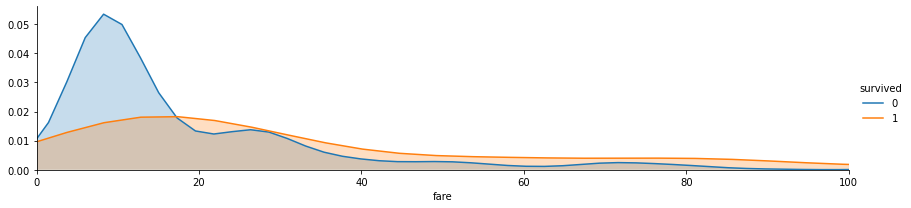

In [6]:
# Create grid 
facet = sns.FacetGrid(titanic, aspect=4, hue='survived')
# Plot the survival rates versus fare 
facet.map(sns.kdeplot, 'fare', shade= True)
# Plot aesthetics
facet.set(xlim=(0,100))
facet.add_legend()

### 3. Relationship between port of embarkation and survival.
* 35% Southampton passengers survived
* 55% Cherbourg passengers survived
* 40% Queenstown passengers survived

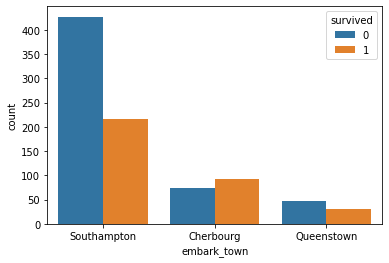

In [7]:
# Number of survivals and death by port of embarkation
bar = sns.countplot(x='embark_town',hue='survived',data=titanic)

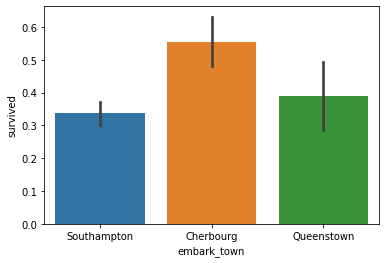

In [8]:
# Proportion of Survivors by port 
sns.barplot('embark_town', 'survived', data=titanic)

### 4. Survival rate by Sex
* 75% female passengers survived
* 19% male passengers survived

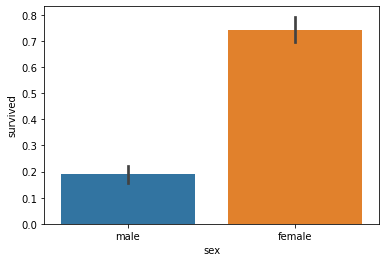

In [9]:
# Plot survival rate by sex 
sns.barplot('sex', 'survived', data=titanic)

### 5. Survival rate by Passenger Class
* 63% first class passengers survived
* 58% second class passengers survived
* 25% third class passengers survived

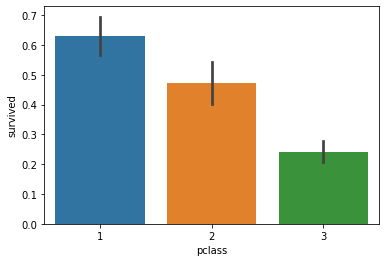

In [10]:
# Plot survival rate by passenger class
sns.barplot('pclass', 'survived', data=titanic)

### 6. Survival rate by number of Siblings/Spouses aboard
* 34% survival rate for those with 0 siblings/spouses aboard
* 54% survival rate for those with 1 siblings/spouses aboard
* 47% survival rate for those with 2 siblings/spouses aboard
* 25% survival rate for those with 3 siblings/spouses aboard
* 16% survival rate for those with 4 siblings/spouses aboard

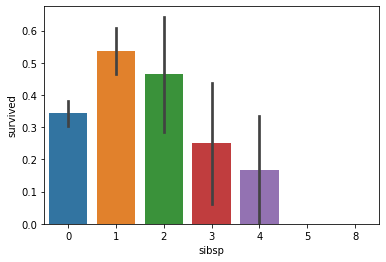

In [11]:
# Plot survival rate by number of siblings/spouses aboard
sns.barplot('sibsp', 'survived', data=titanic)

### 7. Survival rate by number of Parents/Children Aboard
* 34% survival rate for those with 0 parents/children aboard
* 56% survival rate for those with 1 parents/children aboard
* 52% survival rate for those with 2 parents/children aboard
* 60% survival rate for those with 3 parents/children aboard
* 21% survival rate for those with 5 parents/children aboard

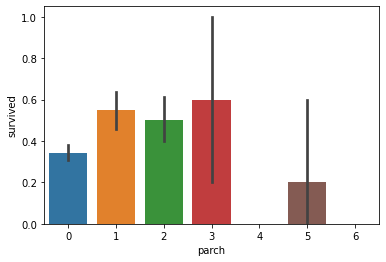

In [12]:
sns.barplot('parch', 'survived', data=titanic)

## II - Data Preparation

### Transform categorical variables to numeric variables

#### Sex
Set female to 1 and male to 0

In [13]:
# Create a series with numeric values for sex
sex = pd.Series(np.where(titanic['sex'] == 'female', 1, 0), name='sex')
# Check values
sex.value_counts()

0    577
1    314
Name: sex, dtype: int64

#### Embark

0 if passenger did not embark at that port, 1 if did embark there.

In [14]:
embark = pd.get_dummies(titanic['embark_town'],prefix='Embarked')
embark

,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


#### Passenger Class

0 if passenger not in class, 1 if is in class.

In [15]:
pclass = pd.get_dummies(titanic['pclass'],prefix='Class')
pclass

,Class_1,Class_2,Class_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


### Fill missing values in variables
Most machine learning algorithms require all variables to have values in order to use it for training the model. 

#### Age

In [16]:
# Create new dataset
imputed = pd.DataFrame()
# Fill empty age values with the mean age
imputed['Age'] = titanic['age'].fillna(titanic['age'].mean())
# Check age values (29.7 is mean age)
imputed['Age'].value_counts().head()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
Name: Age, dtype: int64

#### Fare

In [17]:
# Fill empty fare values with the mean fare price
imputed['Fare'] = titanic['fare'].fillna(titanic['fare'].mean())
# Check if fare column was created
imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### Sample Feature Engineering

Create new features that may help the model make predictions

In [18]:
# Create new dataframe
family = pd.DataFrame()

# New feature: family size is made up of the some of parents/children, siblings/spouses, and the passenger themself
family['FamilySize'] = titanic['parch'] + titanic['sibsp'] + 1

# introducing other features based on the family size
family['Family_Single'] = family['FamilySize'].map(lambda famSize : 1 if famSize == 1 else 0)
family['Family_Small']  = family['FamilySize'].map(lambda famSize : 1 if 2 <= famSize <= 4 else 0)
family['Family_Large']  = family['FamilySize'].map(lambda famSize : 1 if 5 <= famSize else 0)

# Check df
family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


### Assemble final datasets for modelling

#### Select Features

* imputed
* embark
* pclass
* sex
* family

In [19]:
# Create feature matrix
full_X = pd.concat([imputed, embark, pclass, sex, family], axis=1)
full_X.head()

,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Class_1,Class_2,Class_3,sex,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,0,1,0,0,1,0,2,0,1,0
1,38.0,71.2833,1,0,0,1,0,0,1,2,0,1,0
2,26.0,7.9250,0,0,1,0,0,1,1,1,1,0,0
3,35.0,53.1000,0,0,1,1,0,0,1,2,0,1,0
4,35.0,8.0500,0,0,1,0,0,1,0,1,1,0,0


#### Seperate the data into training and test datasets

In [20]:
# import modelling helper 
from sklearn.model_selection import train_test_split

In [21]:
full_X.shape

(891, 13)

In [22]:
# Create training (and validation) dataset
train_valid_X = full_X[0:623]
train_valid_y = titanic['survived'].loc[0:622]
# Create test dataset
test_X = full_X[623:]
# Split the training dataset into training and validation datasets
train_X , valid_X , train_y , valid_y = train_test_split(train_valid_X, train_valid_y, train_size =0.75)
# Check datasets
print(full_X.shape, train_X.shape , valid_X.shape , train_y.shape , valid_y.shape, test_X.shape)

(891, 13) (467, 13) (156, 13) (467,) (156,) (268, 13)


## III - Modeling


In [23]:
# import model
from sklearn.naive_bayes import GaussianNB

In [24]:
# select the model 
model = GaussianNB()

In [25]:
# Train the model
model.fit(train_X, train_y)

GaussianNB()

## IV - Evaluation

Evaluate model performance on training and validation data

In [26]:
# Score the model's performance
print (model.score(train_X, train_y), model.score(valid_X, valid_y)) #77% accurate on training and validation

0.7601713062098501 0.782051282051282


## V - Deployment 

See predictions for test data

In [27]:
# Use the model to predict death/survival for each passenger in test data
test_Y = model.predict(test_X)
# Use the passenger's index as their identifier
passenger_id = titanic[623:].index
# Create a dataframe with the predictions
test = pd.DataFrame({'PassengerId':passenger_id, 'Survived':test_Y})
# Show the test dataframe's shape
test.shape

(268, 2)

In [28]:
# Inspect the head of test dataframe
test.head()

,PassengerId,Survived
0,623,0
1,624,0
2,625,0
3,626,0
4,627,1


In [29]:
# Create a csv file with the test predictions
test.to_csv('files/titanic_predictions.csv', index=False)

### Bonus: Let's compare the predictions to the actual logged survival/deaths

80% accurate on the test data. Note: this analysis would not be possible with real world unlabeled data

In [30]:
# Compares test predictions to corresponding labeled data
def prediction(passengers):
    # Correct Predictions
    trueP = 0
    # Incorrect Predictions
    falseP = 0
    # Passenger ID
    index = 623
    # Loop through all passengers in the test data
    for passenger in passengers['Survived']:
        # If the prediction corresponds to the labeled data
        if titanic.loc[index]['survived'] == passenger:
            # Increment the correct predictions counter
            trueP += 1
        # If the prediction does not fit the labeled data
        else:
            # Increment the false predictions counter
            falseP += 1
        # Next passenger    
        index += 1
    # Percentage of correct predictions    
    accuracy = trueP / (trueP + falseP) * 100
    # Return the percentage of correct predictions
    return accuracy

# See prediction accuracy
prediction(test)

80.59701492537313